In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Dense, Activation

#### Importo il dataset 

In [2]:
data = pd.read_csv('NorwayMeteoDataCompleted.csv')

In [3]:
data

,Unnamed: 0,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,0,SN100,61.134900,12.503900,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,1,2010
1,1,SN1135,58.990000,11.540800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2,2,SN1151800,50.100278,14.255556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
3,3,SN15262,61.674000,8.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
4,4,SN1531000,45.473056,28.032222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237624,237624,SN50110,60.337200,6.217500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,12,2021
237625,237625,SN98978,70.335700,28.964800,-11.25,89.0,2.6,-12.45,89.0,1.8,NaN,29,12,2021
237626,237626,SN299300,60.301111,19.131389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,12,2021
237627,237627,SN50110,60.337200,6.217500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,12,2021


#### Preprocessing rimozione dei valori 'NaN'

In [4]:
print(data.isna().sum())

Unnamed: 0                            0
sourceId                              0
latitude                              0
longtitude                            0
max(air_temperature P1D)         192863
max(relative_humidity P1D)       200664
max(wind_speed P1D)              202369
mean(air_temperature P1D)        174078
mean(relative_humidity P1D)      200218
mean(wind_speed P1D)             202369
sum(precipitation_amount P1D)    129692
day                                   0
month                                 0
year                                  0
dtype: int64


In [5]:
data = data.dropna()
data

,Unnamed: 0,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
34,34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
40,40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
41,41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
80,80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
86,86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235236,235236,SN50110,60.3372,6.2175,14.6,95.0,0.7,12.00,93.0,0.4,18.00,12,9,2019
235239,235239,SN50110,60.3372,6.2175,12.2,95.0,0.8,10.65,88.0,0.3,16.00,13,9,2019
235242,235242,SN50110,60.3372,6.2175,13.5,97.0,1.5,10.50,91.0,0.6,27.60,14,9,2019
235245,235245,SN50110,60.3372,6.2175,13.2,95.0,2.2,10.70,83.0,1.0,45.40,15,9,2019


In [6]:
data = data.drop(columns='sourceId')

#### Impostazione Colonna Data in formato Dateteam 

In [7]:
data['data'] = data['day'].astype(str) + '-' + data['month'].astype(str) + '-' + data['year'].astype(str)
data

,Unnamed: 0,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year,data
34,34,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,1-1-2010
40,40,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,1-1-2010
41,41,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,1-1-2010
80,80,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,2-1-2010
86,86,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,2-1-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235236,235236,60.3372,6.2175,14.6,95.0,0.7,12.00,93.0,0.4,18.00,12,9,2019,12-9-2019
235239,235239,60.3372,6.2175,12.2,95.0,0.8,10.65,88.0,0.3,16.00,13,9,2019,13-9-2019
235242,235242,60.3372,6.2175,13.5,97.0,1.5,10.50,91.0,0.6,27.60,14,9,2019,14-9-2019
235245,235245,60.3372,6.2175,13.2,95.0,2.2,10.70,83.0,1.0,45.40,15,9,2019,15-9-2019


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21799 entries, 34 to 235248
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     21799 non-null  int64  
 1   latitude                       21799 non-null  float64
 2   longtitude                     21799 non-null  float64
 3   max(air_temperature P1D)       21799 non-null  float64
 4   max(relative_humidity P1D)     21799 non-null  float64
 5   max(wind_speed P1D)            21799 non-null  float64
 6   mean(air_temperature P1D)      21799 non-null  float64
 7   mean(relative_humidity P1D)    21799 non-null  float64
 8   mean(wind_speed P1D)           21799 non-null  float64
 9   sum(precipitation_amount P1D)  21799 non-null  float64
 10  day                            21799 non-null  int64  
 11  month                          21799 non-null  int64  
 12  year                           21799 non-null  in

In [9]:
data['data']

34         1-1-2010
40         1-1-2010
41         1-1-2010
80         2-1-2010
86         2-1-2010
            ...    
235236    12-9-2019
235239    13-9-2019
235242    14-9-2019
235245    15-9-2019
235248    16-9-2019
Name: data, Length: 21799, dtype: object

In [10]:
data['data'] = pd.to_datetime(data['data'], format='%d-%m-%Y')


data = data.set_index(data['data'])

#### Illustrazione temperature medie e massime 2020

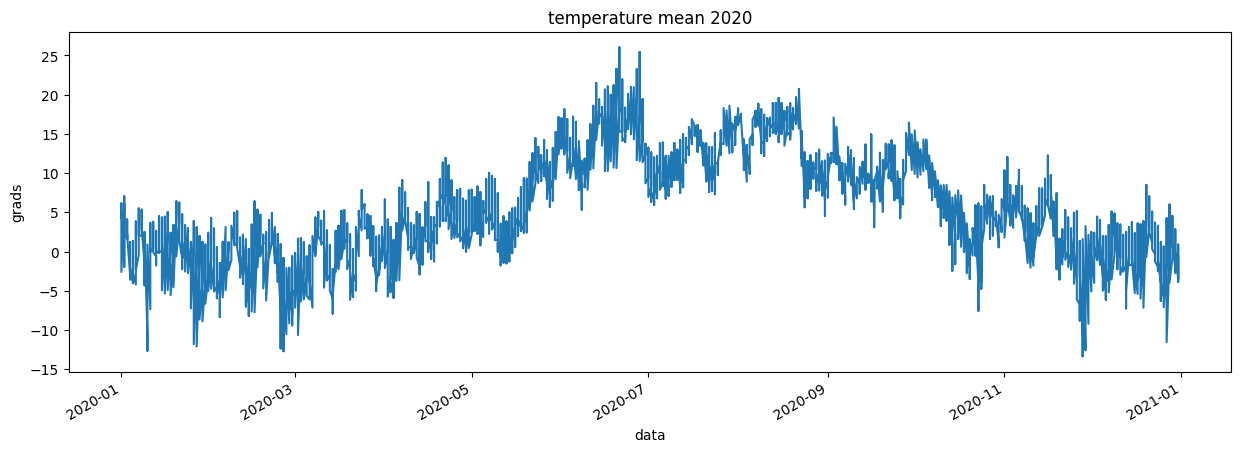

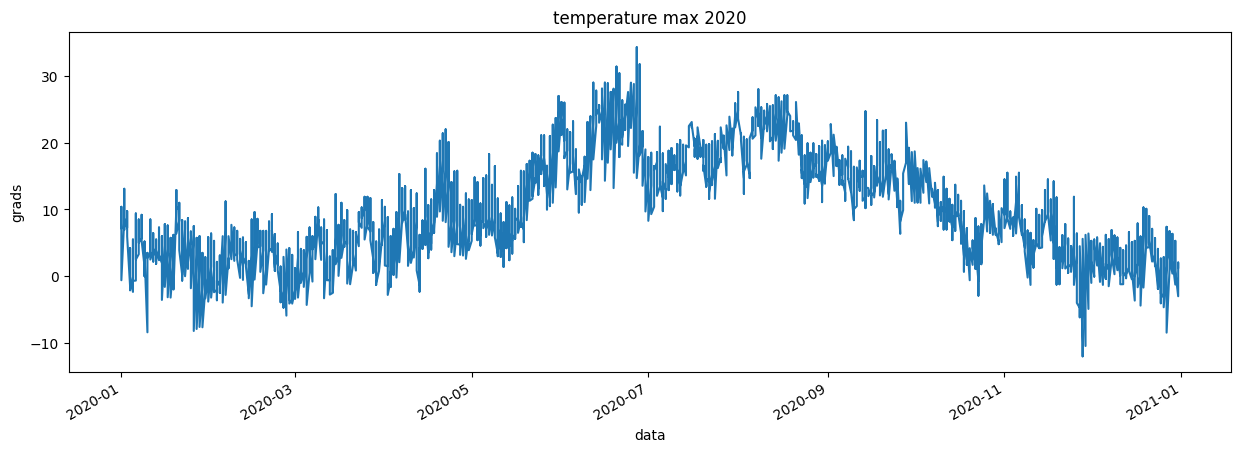

In [11]:
f, ax = plt.subplots(figsize= (15,5))
ax = data.loc['2020', 'mean(air_temperature P1D)'].plot()
ax.set_ylabel('grads');
plt.title('temperature mean 2020')
plt.show()

f, ax = plt.subplots(figsize= (15,5))
ax = data.loc['2020', 'max(air_temperature P1D)'].plot()
ax.set_ylabel('grads');
plt.title('temperature max 2020')
plt.show()

#### Matrice di correlazione per vedere le correlazioni fra le features

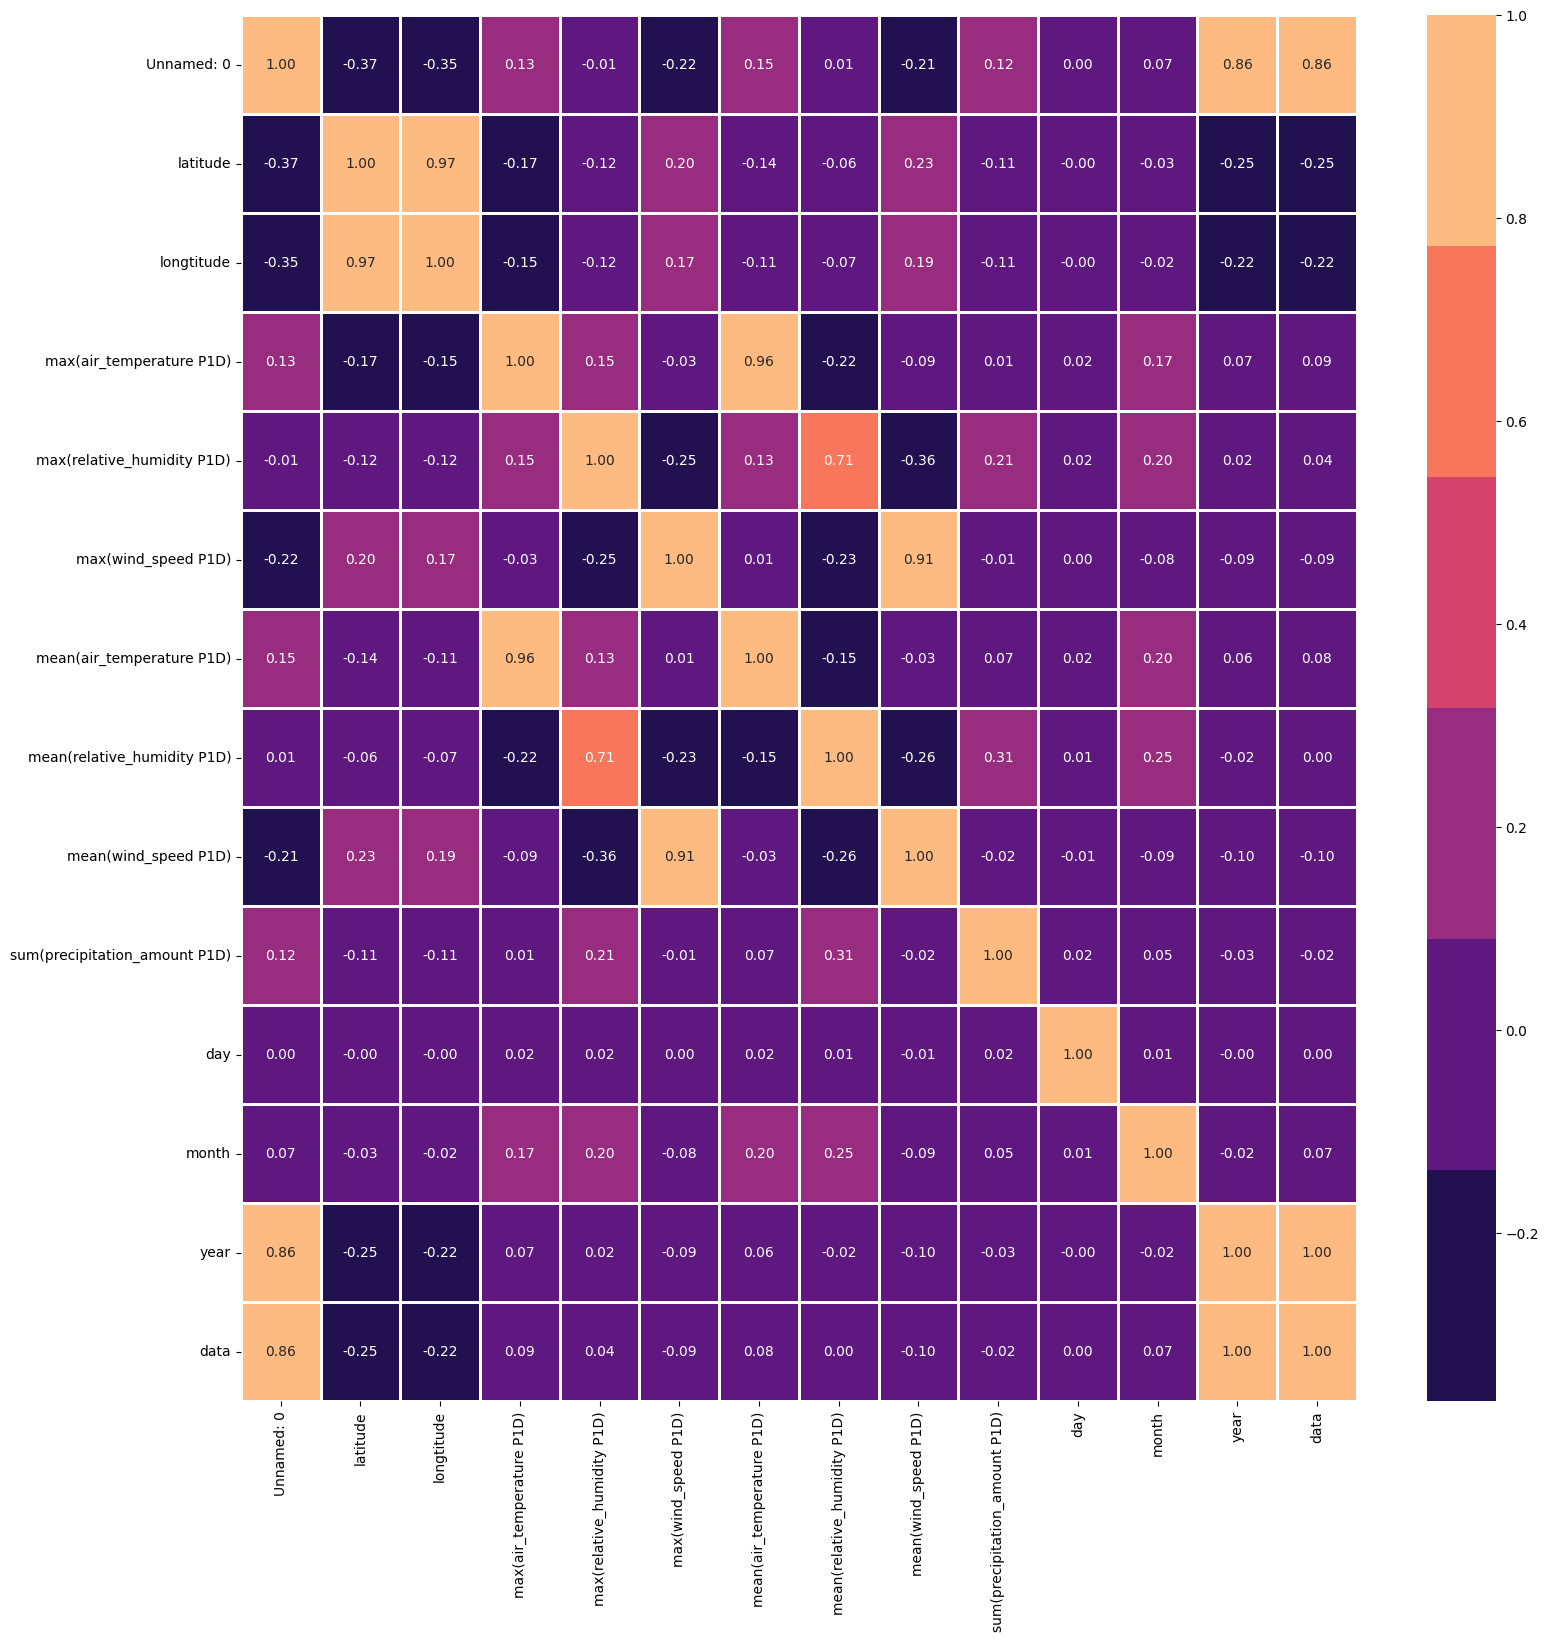

In [12]:
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".2f", cmap=sns.color_palette("magma"), linewidths=1)

plt.show()

#### BoxPlot per vedere la presenza degli Out-Layers ed eliminarli 

['latitude', 'longtitude', 'max(air_temperature P1D)', 'max(relative_humidity P1D)', 'max(wind_speed P1D)', 'mean(air_temperature P1D)', 'mean(relative_humidity P1D)', 'mean(wind_speed P1D)', 'sum(precipitation_amount P1D)']


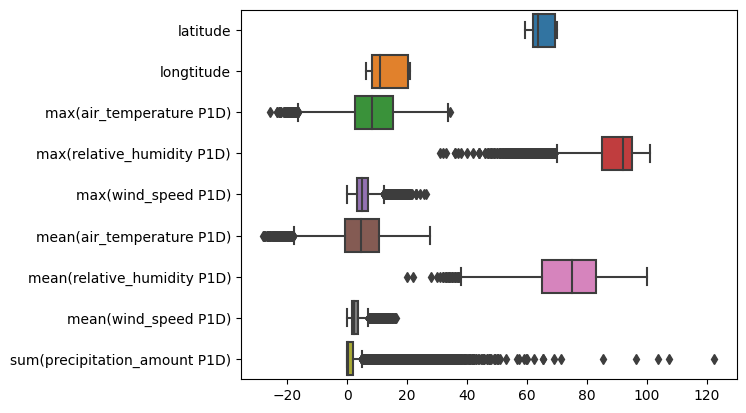

In [13]:
float_columns = list(data.select_dtypes(include=['float64']).columns)
print(float_columns)
sns.boxplot(data = data[float_columns], orient = 'h')
plt.show()

In [14]:
outlier_threshold = 2.5

def IQR(val, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    return val if (val >= lower_bound) and (val <= upper_bound) else float('nan')


column_name = 'sum(precipitation_amount P1D)'
data[column_name] = data.apply(lambda row: IQR(row[column_name], data[column_name]), axis=1)

column_name = 'max(wind_speed P1D)'
data[column_name] = data.apply(lambda row: IQR(row[column_name], data[column_name]), axis=1)

column_name = 'max(relative_humidity P1D)'
data[column_name] = data.apply(lambda row: IQR(row[column_name], data[column_name]), axis=1)


data.dropna(inplace=True)

data.reset_index(drop=True, inplace=True)



In [15]:
data = data.drop('data', axis = 1)
data

,Unnamed: 0,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,34,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
1,40,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
2,41,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
3,80,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
4,86,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19498,235218,60.3372,6.2175,13.1,93.0,1.6,10.50,84.0,0.6,1.60,6,9,2019
19499,235221,60.3372,6.2175,17.3,95.0,1.5,11.85,83.0,0.5,0.20,7,9,2019
19500,235224,60.3372,6.2175,18.0,87.0,2.1,13.00,69.0,0.8,0.00,8,9,2019
19501,235227,60.3372,6.2175,16.4,92.0,2.0,13.60,79.0,0.9,0.00,9,9,2019


['latitude', 'longtitude', 'max(air_temperature P1D)', 'max(relative_humidity P1D)', 'max(wind_speed P1D)', 'mean(air_temperature P1D)', 'mean(relative_humidity P1D)', 'mean(wind_speed P1D)', 'sum(precipitation_amount P1D)']


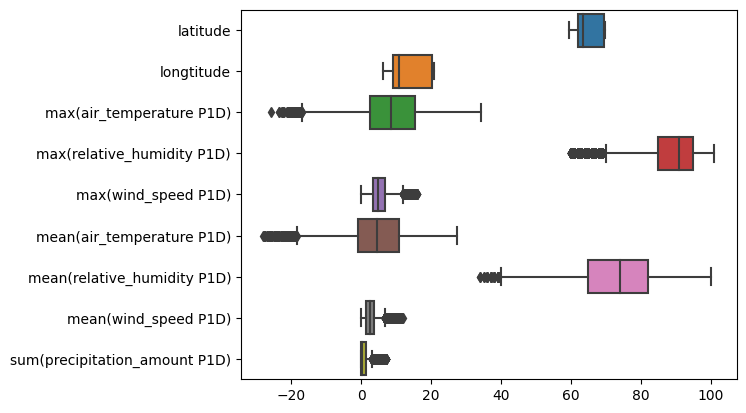

In [16]:
float_columns = list(data.select_dtypes(include=['float64']).columns)
print(float_columns)
sns.boxplot(data = data[float_columns], orient = 'h')
plt.show()

#### Preparazione dei dati di X e Y

In [17]:
y = data['mean(air_temperature P1D)']
print(y)

0        -8.50
1       -11.75
2       -10.90
3       -15.15
4       -12.35
         ...  
19498    10.50
19499    11.85
19500    13.00
19501    13.60
19502    14.15
Name: mean(air_temperature P1D), Length: 19503, dtype: float64


In [18]:
x = data
x = x.drop(['mean(air_temperature P1D)'], axis=1)
print(x)

       Unnamed: 0  latitude  longtitude  max(air_temperature P1D)  \
0              34   63.4597     10.9305                      -2.3   
1              40   69.3875     20.2823                      -9.2   
2              41   69.7887     20.9553                      -8.4   
3              80   63.4597     10.9305                     -13.4   
4              86   69.3875     20.2823                      -8.7   
...           ...       ...         ...                       ...   
19498      235218   60.3372      6.2175                      13.1   
19499      235221   60.3372      6.2175                      17.3   
19500      235224   60.3372      6.2175                      18.0   
19501      235227   60.3372      6.2175                      16.4   
19502      235230   60.3372      6.2175                      16.1   

       max(relative_humidity P1D)  max(wind_speed P1D)  \
0                            83.0                  4.1   
1                            86.0                  5.1 

#### Normalizzazione dei dati

In [19]:
sc = MinMaxScaler()
sc.fit(x)

x =sc.transform (x)
print(x)

y = y.values
y = y.reshape(-1,1)
sc.fit(y)
y = sc.transform(y)
print(y)

[[0.00000000e+00 3.89752391e-01 3.19789928e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.55106379e-05 9.61315952e-01 9.54335111e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.97624109e-05 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99974489e-01 8.86782629e-02 0.00000000e+00 ... 2.33333333e-01
  7.27272727e-01 8.18181818e-01]
 [9.99987245e-01 8.86782629e-02 0.00000000e+00 ... 2.66666667e-01
  7.27272727e-01 8.18181818e-01]
 [1.00000000e+00 8.86782629e-02 0.00000000e+00 ... 3.00000000e-01
  7.27272727e-01 8.18181818e-01]]
[[0.35076646]
 [0.29215509]
 [0.30748422]
 ...
 [0.73850316]
 [0.74932372]
 [0.75924256]]


#### Divisione in file di train e file di test

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
print(x.shape)
print(y.shape)

(19503, 12)
(19503, 1)


#### Creazione architettura della rete convoluzionale e definizione modello 

In [ ]:

inputs = tf.keras.layers.Input(shape = (x.shape[1], 1))
Conv1D = tf.keras.layers.Conv1D(64, 3, padding = 'valid', activation = 'swish', strides = 1)(inputs)
Conv1D_bn = tf.keras.layers.BatchNormalization()(Conv1D)
Conv1D_1 = tf.keras.layers.Conv1D(128, 3, padding = 'valid', activation = 'swish', strides = 1)(Conv1D_bn)
Conv1D_bn = tf.keras.layers.BatchNormalization()(Conv1D_1)
Conv1D_mp = tf.keras.layers.GlobalMaxPooling1D()(Conv1D_bn)
Dense = tf.keras.layers.Dense(256, activation='swish')(Conv1D_bn)
outputs = tf.keras.layers.Dense(1 , activation='sigmoid')(Dense)

model_func = tf.keras.models.Model(
    inputs=inputs,
    outputs=outputs
)
model_func.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
  loss=tf.keras.losses.MeanSquaredError(),
  metrics=['mae'],
)

model_func.summary()

#### Addestramento del modello

In [23]:
history_func = model_func.fit(
    x= x_train,
    y= y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/10
488/488 - 4s - loss: 0.0185 - mae: 0.1074 - val_loss: 0.0219 - val_mae: 0.1207 - 4s/epoch - 9ms/step
Epoch 2/10
488/488 - 3s - loss: 0.0153 - mae: 0.0960 - val_loss: 0.0142 - val_mae: 0.0928 - 3s/epoch - 6ms/step
Epoch 3/10
488/488 - 3s - loss: 0.0142 - mae: 0.0916 - val_loss: 0.0135 - val_mae: 0.0881 - 3s/epoch - 5ms/step
Epoch 4/10
488/488 - 3s - loss: 0.0135 - mae: 0.0884 - val_loss: 0.0131 - val_mae: 0.0875 - 3s/epoch - 6ms/step
Epoch 5/10
488/488 - 3s - loss: 0.0129 - mae: 0.0855 - val_loss: 0.0124 - val_mae: 0.0836 - 3s/epoch - 6ms/step
Epoch 6/10
488/488 - 3s - loss: 0.0124 - mae: 0.0833 - val_loss: 0.0120 - val_mae: 0.0816 - 3s/epoch - 6ms/step
Epoch 7/10
488/488 - 3s - loss: 0.0121 - mae: 0.0823 - val_loss: 0.0115 - val_mae: 0.0796 - 3s/epoch - 6ms/step
Epoch 8/10
488/488 - 3s - loss: 0.0120 - mae: 0.0812 - val_loss: 0.0113 - val_mae: 0.0783 - 3s/epoch - 6ms/step
Epoch 9/10
488/488 - 3s - loss: 0.0118 - mae: 0.0804 - val_loss: 0.0113 - val_mae: 0.0785 - 3s/epoch - 6

#### Illustrazione dei dati di loss e MAE derivati dall addestramento del modello

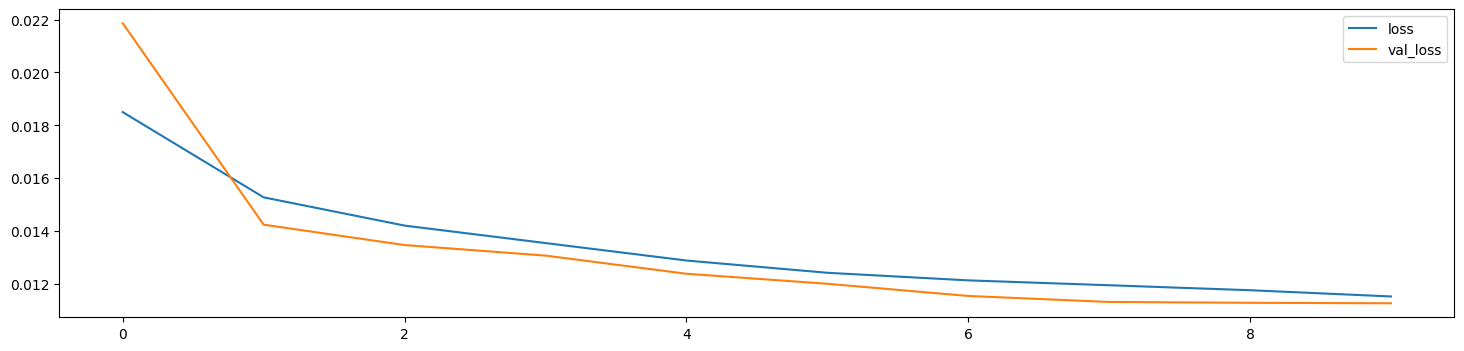

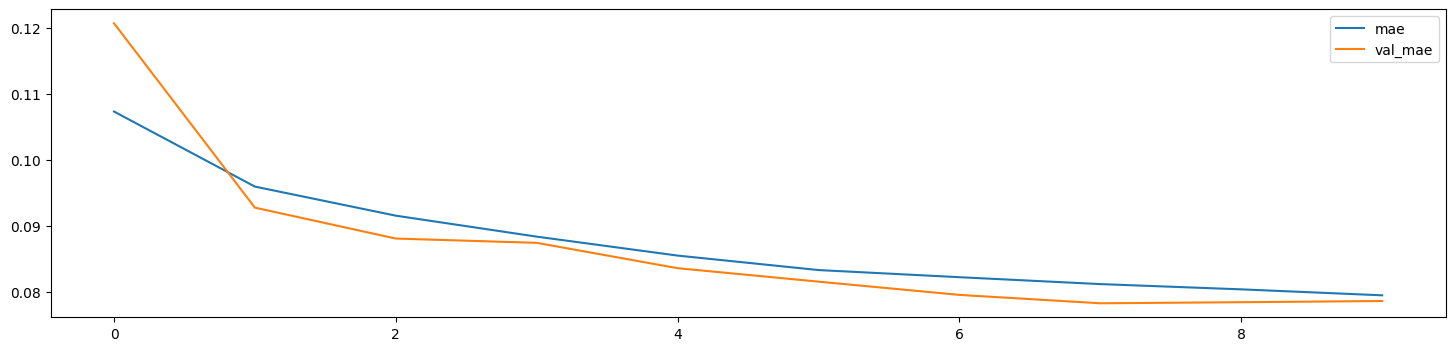

In [24]:
plt.figure(figsize=(18, 4))
plt.plot(history_func.history['loss'], label='loss')
plt.plot(history_func.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_func.history['mae'], label='mae')
plt.plot(history_func.history['val_mae'], label='val_mae')
plt.legend()
plt.show()